# Gravity Disturbance and Misused Free-Air Gravity

## What is Gravity?

Gravity in geophysics represents the total gravity acceleration due to time-dependent variations, moving platform, geology, and the reference ellipsoid (including the Newton Force and Centrifugal Force of the earth). The range of earth gravity is from 976,390 $mGal$ to 983,370 $mGal$.

![image info](./RG.png)

The major component of the earth gravity field is the Newton Force and Centrifugal Force of the reference ellipsoid.
The Newton Force, due to the earth mass, has an order of magnitude of about $10^6 mGal$; The Centrifugal Force is around 1/300 of the Newton Force.

The main goal is to isolate the gravity effect due to the geology variations. However, the Newton Force due to the underline geology is only up to serval hundrends of $mGal$, which is about 0.01% of total gravitational field.
We need to "correct" the non-geology gravity effect to get the signal from the underline geology. 


## Gravity Disturbance and its geological meaning

### Gravity Disturbance

In here, we subtract the normal gravity field from the observed gravity at the measurement location. This is called the Gravity Disturbance. The subtraction of normal gravity removes the majority gravity field from the observed gravity. It leaves the gravity signal of geology below the reference ellipsoid surface (with relative density compared with the ellipsoid), and the "topography effect" due to total mass above the reference ellipsoid surface. Note the difference of geoid (mean sea level) and the ellipsoid surface at the oceanic area cause uncorrected and overcorrected mass of seawater.

![image info](./GD.png)


### Geological Meaning of Gravity Disturbance


![image info](./ggdisturbance.png)



Gravity disturbance is the difference between the magnitude of measured gravity $g_{Q}$ and the normal gravity $\gamma_{Q}$ at the same point.

$\delta g_{Q} =|g_{Q}| - |\gamma_{Q}|$ 

Consider, the Newton Force due to a sphere with density contrast $\Delta p$ is $F$ . It will slightly change the amplitude and direction of meansured gravity. However, due to the large ampilitude of the normal gravity feild, that change will be very small.

Consider the angle between $F$ and the normal gravity is $\theta$, using the law of $\cos$, we can get

$g_{Q}= \sqrt{\gamma_{Q}^2 + 2\gamma_{Q}F\cos\theta + F^2}$

If we subsitude $g_{Q}$ into the gravity disturbance, we then get

$\delta g_{Q} + \gamma_{Q} =\sqrt{\gamma_{Q}^2 + 2\gamma_{Q}F\cos\theta + F^2}$ 

After square both side, and then divide $\gamma_{Q}^2$, we have

$ \frac{\delta g_{Q}}{\gamma_{Q}}^2 + 2\frac{\delta g_{Q}}{\gamma_{Q}} = \frac{F}{\gamma_{Q}}^2 + 2\frac{F\cos\theta}{\gamma_{Q}} $

As the $\gamma_{Q}$ >>$F$ and $\delta g_{Q}$, we can remove the $ \frac{\delta g_{Q}}{\gamma_{Q}}^2$ and $\frac{F}{\gamma_{Q}}^2$, so have 

$\delta g_{Q} \approx F\cos\theta$ 

The gravity disturbance represent the projection of Newton Force of underlined geology at the direction of the normal gravity feild.



### Calculate Gravity Disturbance in Harmonica

This is a part of tutorial on **[transform21](https://github.com/fatiando/transform21)**

#### Import Packages

In [26]:
import pooch
import numpy as np
import xarray as xr
import boule as bl
import harmonica as hm
import matplotlib.pyplot as plt

#### Load South Africa gravity data

In [27]:
data = hm.datasets.fetch_south_africa_gravity()
data

,latitude,longitude,elevation,gravity
0,-34.39150,17.71900,-589.0,979724.79
1,-34.48000,17.76100,-495.0,979712.90
2,-34.35400,17.77433,-406.0,979725.89
3,-34.13900,17.78500,-267.0,979701.20
4,-34.42200,17.80500,-373.0,979719.00
...,...,...,...,...
14554,-17.95833,21.22500,1053.1,978182.09
14555,-17.98333,21.27500,1033.3,978183.09
14556,-17.99166,21.70833,1041.8,978182.69
14557,-17.95833,21.85000,1033.3,978193.18


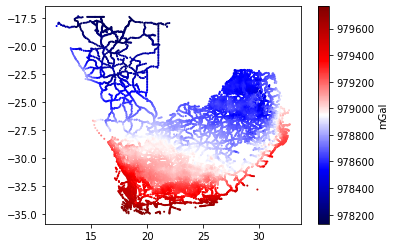

In [28]:
# Plot raw gravity data:

tmp = plt.scatter(
    data.longitude, data.latitude, c=data.gravity, s=1,  cmap="seismic"
)
plt.gca().set_aspect("equal")
plt.colorbar(tmp, label="mGal")
plt.show()

#### Compute gravity disturbance

We will use **[Boule](https://www.fatiando.org/boule)** to get the reference ellipsoid and calculate the normal gravity through
the `normal_gravity()` method. 
It implements the closed-form formula of [Li and Götze (2001)](http://mr.crossref.org/iPage?doi=10.1190%2F1.1487109) which can calculate normal gravity at any latitude and (ellipsoid) height.

In [29]:
# Select the reference ellipsoid:
ell = bl.WGS84

# Calculate the gravity disturbance:
gravity_disturbance = data.gravity - ell.normal_gravity(data.latitude, data.elevation)
# Add the gravity_disturbance to the dataset as a columne: 
data = data.assign(normal_gravity=ell.normal_gravity(data.latitude, data.elevation))
data = data.assign(gravity_disturbance=gravity_disturbance)
data

,latitude,longitude,elevation,gravity,normal_gravity,gravity_disturbance
0,-34.39150,17.71900,-589.0,979724.79,979863.944495,-139.154495
1,-34.48000,17.76100,-495.0,979712.90,979842.384542,-129.484542
2,-34.35400,17.77433,-406.0,979725.89,979804.292114,-78.402114
3,-34.13900,17.78500,-267.0,979701.20,979743.309137,-42.109137
4,-34.42200,17.80500,-373.0,979719.00,979799.833094,-80.833094
...,...,...,...,...,...,...
14554,-17.95833,21.22500,1053.1,978182.09,978198.512829,-16.422829
14555,-17.98333,21.27500,1033.3,978183.09,978205.946385,-22.856385
14556,-17.99166,21.70833,1041.8,978182.69,978203.764753,-21.074753
14557,-17.95833,21.85000,1033.3,978193.18,978204.622843,-11.442843


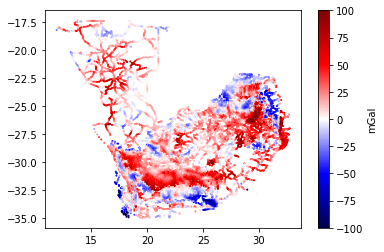

In [30]:
# Plot gravity disturbance:

tmp = plt.scatter(
    data.longitude, data.latitude, c=data.gravity_disturbance, s=1, vmin=-100, vmax=100, cmap="seismic"
)
plt.gca().set_aspect("equal")
plt.colorbar(tmp, label="mGal")
plt.show()

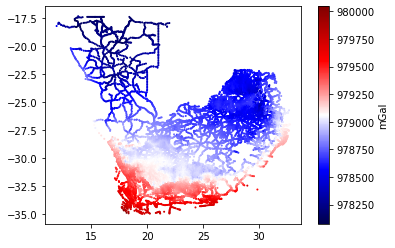

In [31]:
# Plot normal gravity:

tmp = plt.scatter(
    data.longitude, data.latitude, c=data.normal_gravity, s=1, cmap="seismic"
)
plt.gca().set_aspect("equal")
plt.colorbar(tmp, label="mGal")
plt.show()

# Misused Free-Air Gravity

Free-Air Gravity is widely used in geophysics. The idea of Free-Air is removing the normal gravity at the ellipsoid surface, and then use the gradient of normal gravity (The famous 0.3086 mGal/m) to correct the "free-air" between measurements point and the ellipsoid surface. However, the implementation of this idea is wrong, as it neglects the undulation between the geoid and the ellipsoid surface.

Before the large scale application of the Global Positioning System, ellipsoid height $h$ is hard to acquire. The available  height information is the orthometric height $H$. It can be measured along the curved plumb line from surface to geoid. The ellipsoid height $h$ could approximate as the summation of geoid undulation $N$ and orthometric height $H$.

In geophysics, the Free-Air Gravity is defined as:

$\Delta g_{Q} =|g_{Q}| - |\gamma_{P}| - \frac{\partial\gamma}{\partial h}H$

The physical meaning of Free-Air Gravity is

$\Delta g_{Q} =|g_{Q}| - |\gamma_{P'}| $

We can see that, $\gamma_{P'}$ is the upward continuation of $\gamma_{P}$ with $H$ height

The Free-Air Gravity overestimate/underestimate the gravity effect of geology with $\frac{\partial\gamma}{\partial h}N \approx −0.3086N mGal$

This effect could up to $30 mGal$

![image info](./faa.png)